In [1]:
#importing all library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#importing training data
train_data = pd.read_csv('train_ctrUa4K.csv')

In [3]:
#assigning to other variable
tr_d =train_data

In [4]:
tr_d.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
tr_d.shape

(614, 13)

In [6]:
tr_d.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
tr_d.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
tr_d.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
tr_d.drop('Loan_ID', axis='columns', inplace=True)

In [11]:
tr_d.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

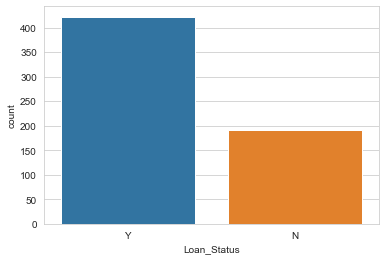

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status', data=tr_d)

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

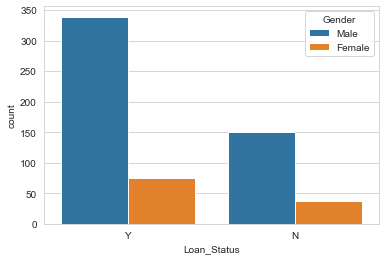

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='Loan_Status',hue='Gender', data=tr_d)

In [16]:
tr_d['Gender'] = tr_d['Gender'].fillna( tr_d['Gender'].mode().values[0] )
tr_d['Married'] = tr_d['Married'].fillna( tr_d['Married'].mode().values[0] )
tr_d['Dependents'] = tr_d['Dependents'].fillna( tr_d['Dependents'].mode().values[0] )
tr_d['Self_Employed'] = tr_d['Self_Employed'].fillna( tr_d['Self_Employed'].mode().values[0] )
tr_d['LoanAmount'] = tr_d['LoanAmount'].fillna( tr_d['LoanAmount'].mean() )
tr_d['Loan_Amount_Term'] = tr_d['Loan_Amount_Term'].fillna( tr_d['Loan_Amount_Term'].mode().values[0] )
tr_d['Credit_History'] = tr_d['Credit_History'].fillna( tr_d['Credit_History'].mode().values[0] )

In [17]:
#removing + symbol
tr_d['Dependents'] = tr_d['Dependents'].str.rstrip('+')

In [18]:
tr_d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [19]:
#converting categorical to int
tr_d['Gender'] = tr_d['Gender'].map({'Female':0,'Male':1}).astype(np.int)
tr_d['Married'] = tr_d['Married'].map({'No':0, 'Yes':1}).astype(np.int)
tr_d['Education'] = tr_d['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
tr_d['Self_Employed'] = tr_d['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
tr_d['Loan_Status'] = tr_d['Loan_Status'].map({'N':0, 'Y':1}).astype(np.int)
tr_d['Property_Area'] = tr_d['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype(np.int)

In [20]:
tr_d.dtypes

Gender                 int32
Married                int32
Dependents            object
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [22]:
# assigning X and Y value
X,y  = tr_d.iloc[:, 0:-1], tr_d.iloc[:, -1]

Test data

In [23]:
test_data = pd.read_csv('test_lAUu6dG.csv')

In [24]:
X_test = test_data

In [25]:
X_test['Gender'] = X_test['Gender'].fillna( X_test['Gender'].dropna().mode().values[0] )
X_test['Married'] = X_test['Married'].fillna( X_test['Married'].dropna().mode().values[0] )
X_test['Dependents'] = X_test['Dependents'].fillna( X_test['Dependents'].dropna().mode().values[0] )
X_test['Self_Employed'] = X_test['Self_Employed'].fillna( X_test['Self_Employed'].dropna().mode().values[0] )
X_test['LoanAmount'] = X_test['LoanAmount'].fillna( X_test['LoanAmount'].dropna().mean() )
X_test['Loan_Amount_Term'] = X_test['Loan_Amount_Term'].fillna( X_test['Loan_Amount_Term'].dropna().mode().values[0] )
X_test['Credit_History'] = X_test['Credit_History'].fillna( X_test['Credit_History'].dropna().mode().values[0] )
X_test['Dependents'] = X_test['Dependents'].str.rstrip('+')
X_test['Gender'] = X_test['Gender'].map({'Female':0,'Male':1}).astype(np.int)
X_test['Married'] = X_test['Married'].map({'No':0, 'Yes':1}).astype(np.int)
X_test['Education'] = X_test['Education'].map({'Not Graduate':0, 'Graduate':1}).astype(np.int)
X_test['Self_Employed'] = X_test['Self_Employed'].map({'No':0, 'Yes':1}).astype(np.int)
X_test['Dependents'] = X_test['Dependents'].astype(np.int)
X_test['Property_Area'] = X_test['Property_Area'].map({'Urban':0, 'Rural':1, 'Semiurban':2}).astype(np.int)	

In [26]:
X_test.drop('Loan_ID', axis='columns', inplace=True)

In [27]:
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,0
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,0
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,0
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,0
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,0,1,4009,1777,113.0,360.0,1.0,0
363,1,1,0,1,0,4158,709,115.0,360.0,1.0,0
364,1,0,0,1,0,3250,1993,126.0,360.0,1.0,2
365,1,1,0,1,0,5000,2393,158.0,360.0,1.0,1


Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X, y)

DecisionTreeClassifier()

In [30]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,

Support Vector Machine

In [31]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X, y)

SVC()

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,